In [2]:
from kaggle.competitions import twosigmanews
env = twosigmanews.make_env()

Loading the data... This could take a minute.
Done!


In [3]:
(market_train_df, news_train_df) = env.get_training_data()

In [4]:
# Re-arrange the dataframe by assetCode
market_train_df_name = market_train_df.sort_values(['assetCode', 'time'], ascending=[True, True]).reset_index()

In [5]:
# Prepare functionalities to calculate technical indicator
import math
import numpy as np
import statsmodels.api as sm
import pandas as pd

# Input: price or volume series
# Calculate relative return between end and begin of period
# Allow for NaN
def truncated_return( arr ):
    if arr[0]>0.0:
        return arr[-1]/arr[0]-1.0
    else:
        return float('nan')
    
# Input: return on price or volume series
# Average gain percentage among gaining days
def average_gain( ret_arr ):
    return np.mean(ret_arr[ret_arr>0])

# Input: return on price or volume series
# Average loss percentage among losing days
def average_loss( ret_arr ):
    return -np.mean(ret_arr[ret_arr<0])

# Input: return on price or volume series
# Calculate the relative strength index
def relativeStrength( ret_arr, window ):
    return ret_arr.rolling(window).apply(average_gain)/ret_arr.rolling(window).apply(average_loss)

# Input: price or volume 
# Slope of regression of log prices or volumes
def momentumSlope( arr ):
    y = np.array(pd.Series(arr).apply(np.log))
    X = np.array([[1,0,i] for i in range(len(y))])
    model = sm.OLS(y,X).fit()
    return model.params[1]

# Input: price or volume 
# t-statistics of regression of log prices or volumes
def momentumTstat( arr ):
    y = np.array(pd.Series(arr).apply(np.log))
    X = np.array([[1.0,i] for i in range(len(y))])
    model = sm.OLS(y,X).fit()
    return model.tvalues[1]

/opt/conda/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


# Generate technical indicators by name

In [6]:
# Calculate 1-day and 10-day relative return of volume
market_train_df_name['returnsVolumePrev1'] = market_train_df_name['volume'].rolling(2).apply(truncated_return)
market_train_df_name['returnsVolumePrev10'] = market_train_df_name['volume'].rolling(11).apply(truncated_return)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until


In [7]:
# Calculate 5-day, 10-day and 20-day moving average of close price
market_train_df_name['CloseMA5' ] = market_train_df_name['close'].rolling(5).apply(np.mean)
market_train_df_name['CloseMA10'] = market_train_df_name['close'].rolling(10).apply(np.mean)
market_train_df_name['CloseMA20'] = market_train_df_name['close'].rolling(20).apply(np.mean)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' 

In [8]:
# Calculate relative return on 5-day, 10-day and 20-day moving average of close price
market_train_df_name['returnsCloseMA5' ] = market_train_df_name['close']/market_train_df_name['CloseMA5' ]-1.0
market_train_df_name['returnsCloseMA10'] = market_train_df_name['close']/market_train_df_name['CloseMA10']-1.0
market_train_df_name['returnsCloseMA20'] = market_train_df_name['close']/market_train_df_name['CloseMA20']-1.0

In [10]:
# Calculate 5-day, 10-day and 20-day moving average of volume
market_train_df_name['VolumeMA5' ] = market_train_df_name['volume'].rolling(5).apply(np.mean)
market_train_df_name['VolumeMA10'] = market_train_df_name['volume'].rolling(10).apply(np.mean)
market_train_df_name['VolumeMA20'] = market_train_df_name['volume'].rolling(20).apply(np.mean)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' 

In [11]:
# Calculate relative return on 5-day, 10-day and 20-day moving average of volume
market_train_df_name['returnsVolumeMA5' ] = market_train_df_name['volume']/market_train_df_name['VolumeMA5' ]-1.0
market_train_df_name['returnsVolumeMA10'] = market_train_df_name['volume']/market_train_df_name['VolumeMA10']-1.0
market_train_df_name['returnsVolumeMA20'] = market_train_df_name['volume']/market_train_df_name['VolumeMA20']-1.0

In [12]:
# Calculate RSI based on return on close prices
# A bit slow, need improvement
#market_train_df_name['relativeStrengthCloseRaw10'] = relativeStrength(market_train_df_name['returnsClosePrevRaw1'],10)
#market_train_df_name['relativeStrengthCloseRaw20'] = relativeStrength(market_train_df_name['returnsClosePrevRaw1'],20)
#market_train_df_name['relativeStrengthCloseRaw60'] = relativeStrength(market_train_df_name['returnsClosePrevRaw1'],60)

In [13]:
# Calculate RSI based on return on open prices
# A bit slow, need improvement
#market_train_df_name['relativeStrengthOpenRaw10'] = relativeStrength(market_train_df_name['returnsOpenPrevRaw1'],10)
#market_train_df_name['relativeStrengthOpenRaw20'] = relativeStrength(market_train_df_name['returnsOpenPrevRaw1'],20)
#market_train_df_name['relativeStrengthOpenRaw60'] = relativeStrength(market_train_df_name['returnsOpenPrevRaw1'],60)

In [14]:
# Calculate 5-day, 10-day and 20-day momentum slope on price
# Too slow for now, need improvement
#market_train_df_name['momSlope5' ]  = market_train_df_name['close' ].rolling(5).apply(momentumSlope)
#market_train_df_name['momSlope10' ] = market_train_df_name['close'].rolling(10).apply(momentumSlope)
#market_train_df_name['momSlope20' ] = market_train_df_name['close'].rolling(20).apply(momentumSlope)

In [15]:
# Calculate 5-day, 10-day and 20-day momentum t-stat on price
# Too slow for now, need improvement
#market_train_df_name['momTstat5' ]  = market_train_df_name['close' ].rolling(5).apply(momentumTstat)
#market_train_df_name['momTstat10']  = market_train_df_name['close'].rolling(10).apply(momentumTstat)
#market_train_df_name['momTstat20']  = market_train_df_name['close'].rolling(20).apply(momentumTstat)

In [16]:
# Re-arrange the dataframe by time
market_train_df = market_train_df_name.sort_values(['time', 'assetCode'], ascending=[True, True]).reset_index(drop = True) 

# Outlier filter

In [17]:
# Filter unreasonble close/open prices and next 10-day returns
market_train_df = market_train_df[market_train_df['returnsClosePrevRaw1']>-0.4]
market_train_df = market_train_df[market_train_df['returnsClosePrevRaw1']< 0.4]
market_train_df = market_train_df[market_train_df['returnsOpenPrevRaw1']>-0.4]
market_train_df = market_train_df[market_train_df['returnsOpenPrevRaw1']< 0.4]
market_train_df = market_train_df[market_train_df['returnsOpenNextMktres10']>=-1.0]
market_train_df = market_train_df[market_train_df['returnsOpenNextMktres10']<  2.0]

In [18]:
market_train_df = market_train_df.reset_index(drop=True)

# Get date partition information

In [19]:
import matplotlib.pyplot as plt

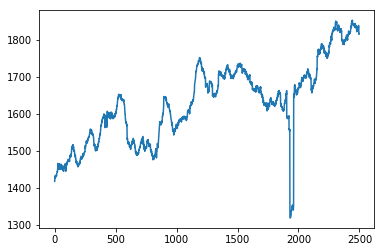

In [20]:
# Get number of stocks (tradeable and non-tradeable) for a given date
count = 0
count_list = []
curr_date = market_train_df['time'][0]
for date in market_train_df['time']:
    if date == curr_date:
        count+=1
    else:
        count_list.append(count)
        curr_date = date
        count = 1
count_list.append(count)
plt.plot(count_list)

In [21]:
print(len(count_list))
print(sum(count_list))

2498
4071747


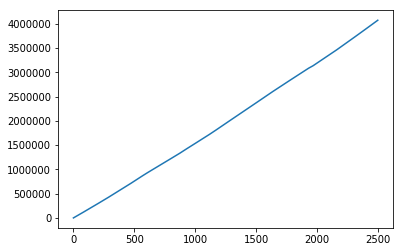

In [22]:
partition_rows = [0] + list(np.cumsum(count_list))
plt.plot(partition_rows)

# Factor assessment

In [23]:
# Calculate the returns and Sharpe ratio of long-short portfolio for a single factor 
def backtest_single_score( score, num_group = 5, offset = 0 ):
    returns = []
    for i in range(offset,len(count_list)):
        try:
            l = partition_rows[i]
            r = partition_rows[i+1]
            stock_ret_i = market_train_df['returnsOpenNextMktres10'][l:r]
            score_i = score[l:r]
            index_i = np.argsort(score_i)+l
            tradeable_ret_i = stock_ret_i*market_train_df['universe'][l:r]
            port_ret_i = np.mean(tradeable_ret_i[index_i[-(r-l)//num_group:]])-np.mean(tradeable_ret_i[index_i[:(r-l)//num_group]])
            returns.append(port_ret_i)
        except:
            pass
    print("Sharpe ratio:",np.mean(returns)/np.std(returns))
    return returns,np.mean(returns)/np.std(returns)

In [24]:
# Calculate the returns and Sharpe ratio of long-short portfolio for two factors together
def backtest_double_score( score1, score2, num_group_1 = 5,num_group_2 = 5, offset = 0 ):
    returns = []
    for i in range(offset,len(count_list)):
        l = partition_rows[i]
        r = partition_rows[i+1]

        stock_ret_i = market_train_df['returnsOpenNextMktres10'][l:r]
        tradeable_ret_i = stock_ret_i*market_train_df['universe'][l:r]

        score1_i = score1[l:r]
        score2_i = score2[l:r]

        score_df = pd.DataFrame({'index':range(l,r),'score1':score1_i,'score2':score2_i})
        score_df = score_df.sort_values(['score1'],ascending = [True])
        group_size = (r-l)//num_group_1
        score_df['score1_group'] = [-1]*group_size+[0]*(r-l-2*group_size)+[1]*group_size
        score_df = score_df.sort_values(['score1_group','score2'],ascending = [True,True])

        port_ret_i = np.mean(tradeable_ret_i[score_df['index'][-(r-l)//(num_group_1*num_group_2):]])-\
                     np.mean(tradeable_ret_i[score_df['index'][:(r-l)//(num_group_1*num_group_2)]])
        returns.append(port_ret_i)
        
    print("Sharpe ratio:",np.mean(returns)/np.std(returns))
    return returns,np.mean(returns)/np.std(returns)

In [25]:
# Assume we can realize 10-day return in one day and rebalance every day
# Use all the return data
def plot_returns ( returns ):
    net_value = [1.0]
    for ret in returns:
        net_value.append(net_value[-1]*(1+ret))
    plt.plot(net_value)
    plt.legend()

In [26]:
# Rebalance every 10 days
# Only use 1/10 of the data
def plot_returns_real ( returns, offset = 0,label = '' ):
    net_value = [1.0]
    for i in range(offset,len(returns),10):
        net_value.append(net_value[-1]*(1+returns[i]))
    plt.plot(net_value, label = label)
    plt.legend()

In [27]:
# Check the avaiable factors
print(market_train_df.columns)

Index(['index', 'time', 'assetCode', 'assetName', 'volume', 'close', 'open',
       'returnsClosePrevRaw1', 'returnsOpenPrevRaw1',
       'returnsClosePrevMktres1', 'returnsOpenPrevMktres1',
       'returnsClosePrevRaw10', 'returnsOpenPrevRaw10',
       'returnsClosePrevMktres10', 'returnsOpenPrevMktres10',
       'returnsOpenNextMktres10', 'universe', 'returnsVolumePrev1',
       'returnsVolumePrev10', 'CloseMA5', 'CloseMA10', 'CloseMA20',
       'returnsCloseMA5', 'returnsCloseMA10', 'returnsCloseMA20', 'VolumeMA5',
       'VolumeMA10', 'VolumeMA20', 'returnsVolumeMA5', 'returnsVolumeMA10',
       'returnsVolumeMA20'],
      dtype='object')


Testing factor returnsClosePrevRaw1
Sharpe ratio: -0.14390996278464763


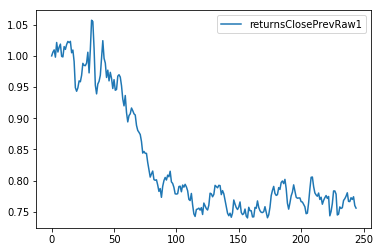

Testing factor returnsOpenPrevRaw1
Sharpe ratio: -0.052731369414426126


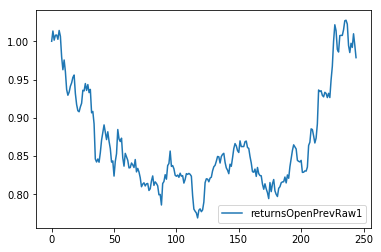

Testing factor returnsClosePrevMktres1


/opt/conda/lib/python3.6/site-packages/pandas/core/series.py:842: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


Sharpe ratio: -0.09133360644554274


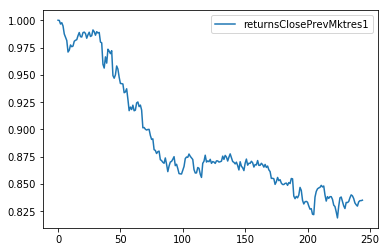

Testing factor returnsOpenPrevMktres1
Sharpe ratio: 0.00932953944727446


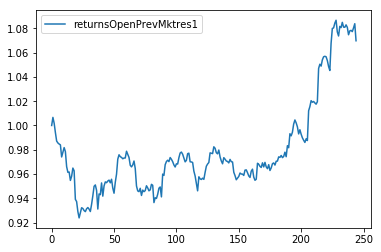

Testing factor returnsClosePrevRaw10
Sharpe ratio: 0.2854693063667267


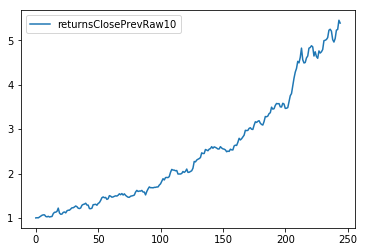

Testing factor returnsOpenPrevRaw10
Sharpe ratio: 0.3374548385635218


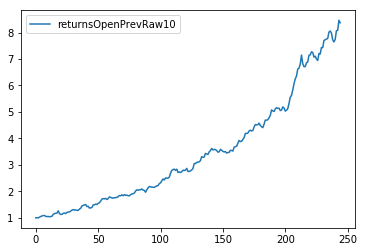

Testing factor returnsClosePrevMktres10
Sharpe ratio: 0.06219138531728307


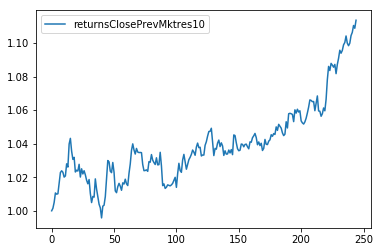

Testing factor returnsOpenPrevMktres10
Sharpe ratio: 0.07781947406156553


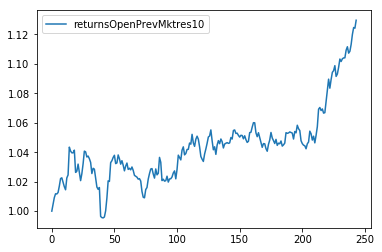

Testing factor returnsVolumePrev1
Sharpe ratio: 0.020318204198696534


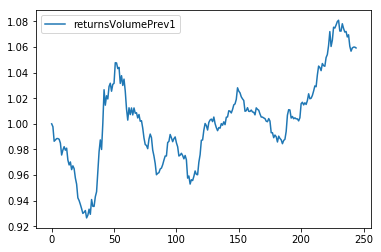

Testing factor returnsVolumePrev10
Sharpe ratio: 0.033621083463334894


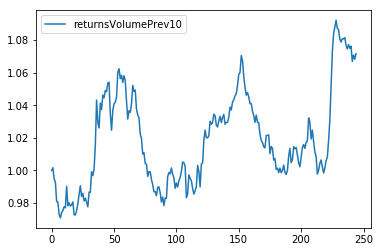

Testing factor CloseMA5
Sharpe ratio: 0.14585096082869098


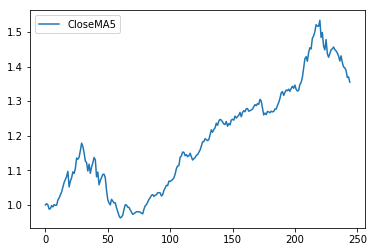

Testing factor CloseMA10
Sharpe ratio: 0.1349389197495438


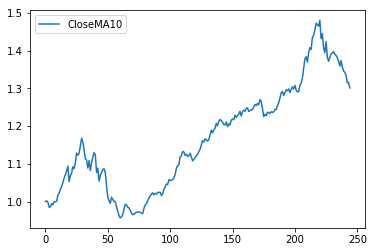

Testing factor CloseMA20
Sharpe ratio: 0.10138069514388867


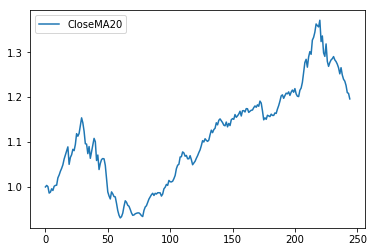

Testing factor returnsCloseMA5
Sharpe ratio: -0.0557414666049919


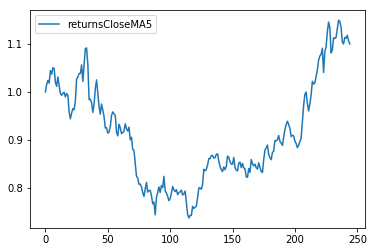

Testing factor returnsCloseMA10
Sharpe ratio: 0.1330432256883526


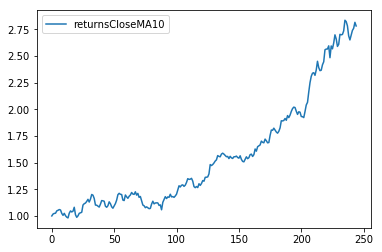

Testing factor returnsCloseMA20
Sharpe ratio: 0.3439716265717822


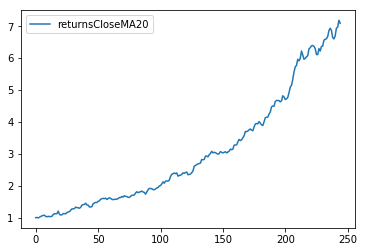

Testing factor VolumeMA5
Sharpe ratio: 0.054117931852199125


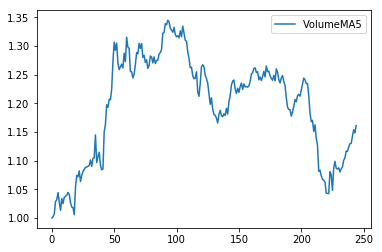

Testing factor VolumeMA10
Sharpe ratio: 0.05254756293484796


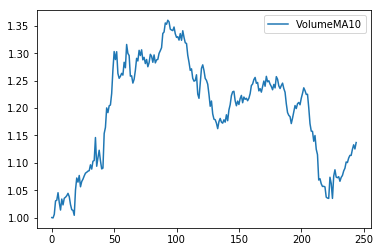

Testing factor VolumeMA20
Sharpe ratio: 0.057585822283709634


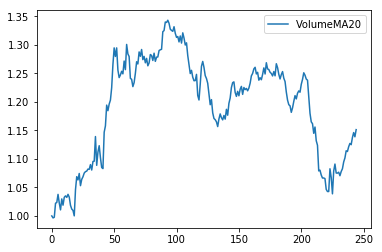

Testing factor returnsVolumeMA5
Sharpe ratio: 0.06421778800622455


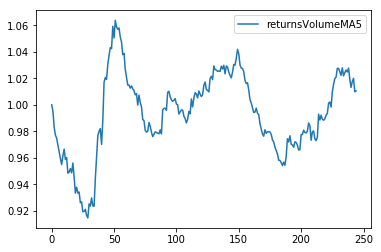

Testing factor returnsVolumeMA10
Sharpe ratio: 0.07299632703815735


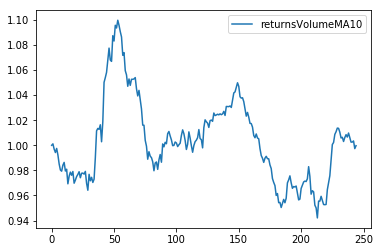

Testing factor returnsVolumeMA20
Sharpe ratio: 0.04459755138949114


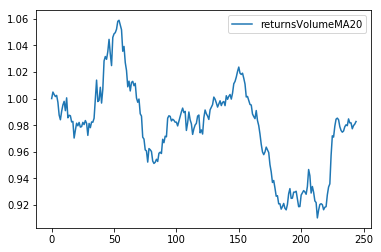

In [28]:
exclude_list = ['returnsOpenNextMktres10', 'universe']
for factor in market_train_df.columns[7:]:
    if factor not in exclude_list:
        print('Testing factor '+factor)
        single_factor_result = backtest_single_score( market_train_df[factor], offset = 60 )
        plot_returns_real(single_factor_result[0],label = factor)
        plt.show()

Sharpe ratio: 2.865974811643145


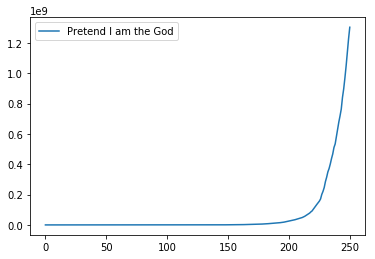

In [30]:
# Look-ahead
impossible_result = backtest_single_score( market_train_df['returnsOpenNextMktres10'] )
plot_returns_real(impossible_result[0],label = 'Pretend I am the God')

In [31]:
# Filter the factors with positive Sharpe ratios
# It is interesting that stock with larger nominal price value or marketcap would outperform; need further investigation
potential_price_factors = ['returnsOpenPrevMktres1',
                           'returnsClosePrevRaw10',
                           'returnsOpenPrevRaw10',
                           'returnsClosePrevMktres10',
                           'returnsOpenPrevMktres10',
                           'CloseMA5',
                           'CloseMA10',
                           'CloseMA20',
                           'returnsCloseMA10',
                           'returnsCloseMA20']

potential_volume_factors = ['returnsVolumePrev1',
                            'returnsVolumePrev10',
                            'VolumeMA5',
                            'VolumeMA10',
                            'VolumeMA20',
                            'returnsVolumeMA5',
                            'returnsVolumeMA10',
                            'returnsVolumeMA20']

# Cross-effect between volume and price

Testing returnsOpenPrevMktres1+returnsVolumePrev1
Sharpe ratio: 0.00932953944727446
Sharpe ratio: 0.020318204198696534
Sharpe ratio: -0.020534879209661534


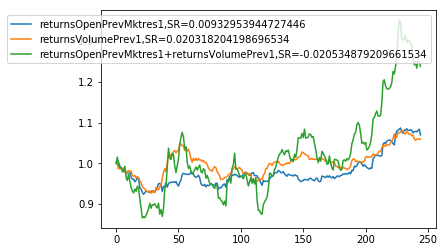

Testing returnsOpenPrevMktres1+returnsVolumePrev10
Sharpe ratio: 0.00932953944727446
Sharpe ratio: 0.033621083463334894
Sharpe ratio: -0.0029787021286967795


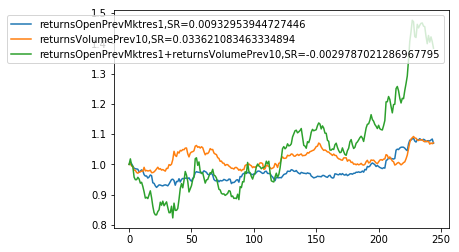

Testing returnsClosePrevRaw10+returnsVolumePrev1
Sharpe ratio: 0.2854693063667267
Sharpe ratio: 0.020318204198696534
Sharpe ratio: 0.2380870294183471


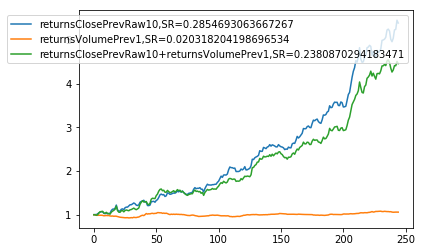

Testing returnsClosePrevRaw10+returnsVolumePrev10
Sharpe ratio: 0.2854693063667267
Sharpe ratio: 0.033621083463334894
Sharpe ratio: 0.2703457558756116


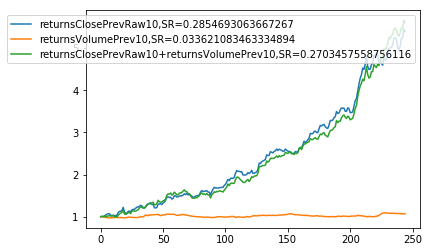

Testing returnsOpenPrevRaw10+returnsVolumePrev1
Sharpe ratio: 0.3374548385635218
Sharpe ratio: 0.020318204198696534
Sharpe ratio: 0.29418860686693005


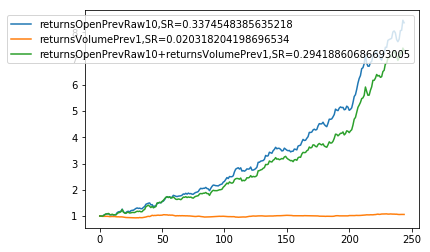

Testing returnsOpenPrevRaw10+returnsVolumePrev10
Sharpe ratio: 0.3374548385635218
Sharpe ratio: 0.033621083463334894
Sharpe ratio: 0.3393011054634479


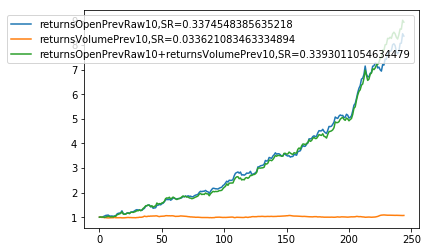

Testing returnsClosePrevMktres10+returnsVolumePrev1
Sharpe ratio: 0.06219138531728307
Sharpe ratio: 0.020318204198696534
Sharpe ratio: 0.28156343700569453


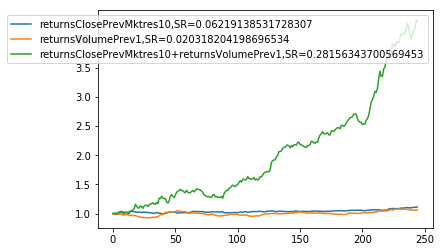

Testing returnsClosePrevMktres10+returnsVolumePrev10
Sharpe ratio: 0.06219138531728307
Sharpe ratio: 0.033621083463334894
Sharpe ratio: 0.2929479825279143


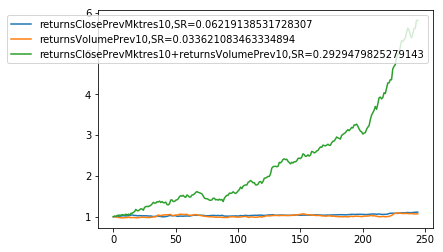

Testing returnsOpenPrevMktres10+returnsVolumePrev1
Sharpe ratio: 0.07933471441153375
Sharpe ratio: 0.020318204198696534
Sharpe ratio: 0.3369503181299189


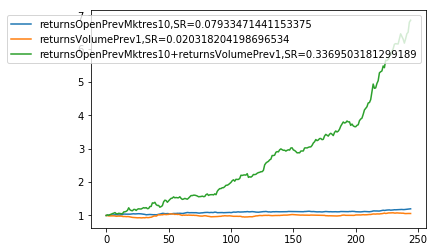

Testing returnsOpenPrevMktres10+returnsVolumePrev10
Sharpe ratio: 0.07933471441153375
Sharpe ratio: 0.033621083463334894
Sharpe ratio: 0.35703254189873657


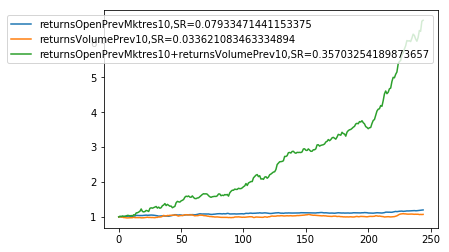

In [32]:
# For the sake of time, only test first few factors now
# num_group = 5 for both single and double factor cases
for price_factor in potential_price_factors[:5]:
    for volume_factor in potential_volume_factors[:2]:
        print('Testing '+price_factor+'+'+volume_factor)
        price_only_result  = backtest_single_score( market_train_df[price_factor], offset = 60 )
        volume_only_result = backtest_single_score( market_train_df[volume_factor], offset = 60 )
        price_volume_result  = backtest_double_score( market_train_df[price_factor],market_train_df[volume_factor], offset = 60)
        plot_returns_real(price_only_result[0],label = price_factor+',SR='+str(price_only_result[1]))
        plot_returns_real(volume_only_result[0],label = volume_factor+',SR='+str(volume_only_result[1]))
        plot_returns_real(price_volume_result[0],label = price_factor+'+'+volume_factor+',SR='+str(price_volume_result[1]))
        plt.show()

Testing returnsOpenPrevMktres1+returnsVolumePrev1
Sharpe ratio: 0.003127661544877421
Sharpe ratio: 0.02059798247067018
Sharpe ratio: -0.023482728986392008


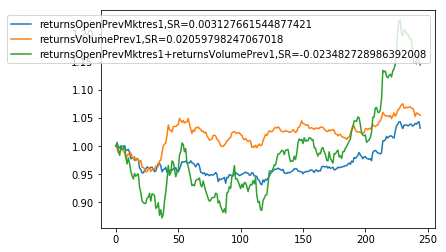

Testing returnsOpenPrevMktres1+returnsVolumePrev10
Sharpe ratio: 0.003127661544877421
Sharpe ratio: 0.02305231563053623
Sharpe ratio: -0.004512135347607575


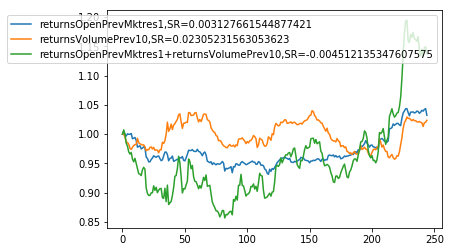

Testing returnsClosePrevRaw10+returnsVolumePrev1
Sharpe ratio: 0.27176754447517193
Sharpe ratio: 0.02059798247067018
Sharpe ratio: 0.2649203200203927


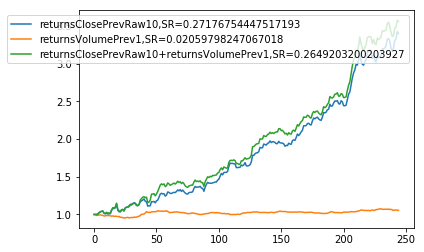

Testing returnsClosePrevRaw10+returnsVolumePrev10
Sharpe ratio: 0.27176754447517193
Sharpe ratio: 0.02305231563053623
Sharpe ratio: 0.2789742346251138


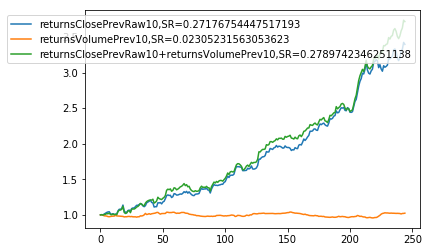

Testing returnsOpenPrevRaw10+returnsVolumePrev1
Sharpe ratio: 0.3266257186020682
Sharpe ratio: 0.02059798247067018
Sharpe ratio: 0.3175816935833617


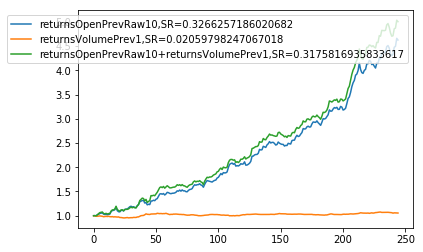

Testing returnsOpenPrevRaw10+returnsVolumePrev10
Sharpe ratio: 0.3266257186020682
Sharpe ratio: 0.02305231563053623
Sharpe ratio: 0.34143111180659563


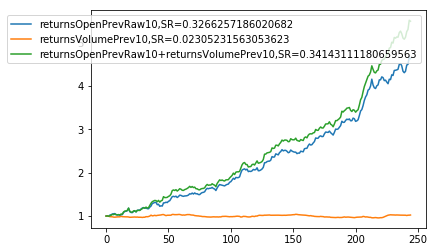

Testing returnsClosePrevMktres10+returnsVolumePrev1
Sharpe ratio: 0.07582062203026768
Sharpe ratio: 0.02059798247067018
Sharpe ratio: 0.3081637391483961


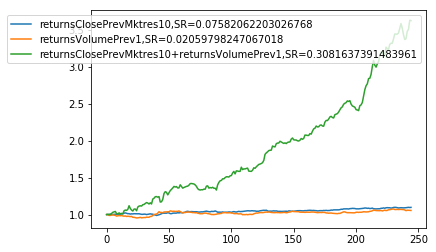

Testing returnsClosePrevMktres10+returnsVolumePrev10
Sharpe ratio: 0.07582062203026768
Sharpe ratio: 0.02305231563053623
Sharpe ratio: 0.3164676420537734


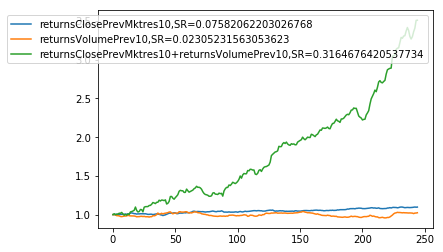

Testing returnsOpenPrevMktres10+returnsVolumePrev1
Sharpe ratio: 0.08946395074521891
Sharpe ratio: 0.02059798247067018
Sharpe ratio: 0.3719481608364899


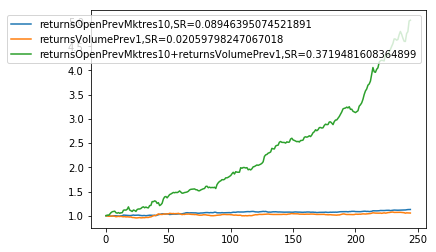

Testing returnsOpenPrevMktres10+returnsVolumePrev10
Sharpe ratio: 0.08946395074521891
Sharpe ratio: 0.02305231563053623
Sharpe ratio: 0.3863319970346361


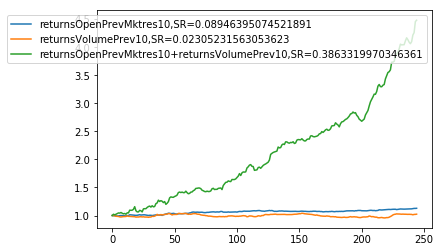

In [33]:
# For the sake of time, only test first few factors now
# num_group = 3 for both single and double factor cases
for price_factor in potential_price_factors[:5]:
    for volume_factor in potential_volume_factors[:2]:
        print('Testing '+price_factor+'+'+volume_factor)
        price_only_result  = backtest_single_score( market_train_df[price_factor], num_group = 3, offset = 60 )
        volume_only_result = backtest_single_score( market_train_df[volume_factor], num_group = 3, offset = 60 )
        price_volume_result  = backtest_double_score( market_train_df[price_factor],market_train_df[volume_factor], \
                                                     num_group_1 = 3, num_group_2 = 3, offset = 60)
        plot_returns_real(price_only_result[0],label = price_factor+',SR='+str(price_only_result[1]))
        plot_returns_real(volume_only_result[0],label = volume_factor+',SR='+str(volume_only_result[1]))
        plot_returns_real(price_volume_result[0],label = price_factor+'+'+volume_factor+',SR='+str(price_volume_result[1]))
        plt.show()

# Ranking and demeaning

In [34]:
# Ranking and demeaning price factors
for factor in ['returnsClosePrevRaw10','returnsOpenPrevRaw10','returnsCloseMA20']:
    print('Ranking and demeaning factor '+factor)
    market_train_df[factor+'rank'] = market_train_df[factor][:]
    for i in range(len(count_list)):
        try:
            l = partition_rows[i]
            r = partition_rows[i+1]
            universe_size = len(market_train_df[factor][l:r])
            market_train_df[factor+'rank'][l:r] = 1.0*np.argsort(market_train_df[factor][l:r])/universe_size
        except:
            pass

Ranking and demeaning factor returnsClosePrevRaw10


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Ranking and demeaning factor returnsOpenPrevRaw10
Ranking and demeaning factor returnsCloseMA20


In [35]:
# Ranking and demeaning volume factors
for factor in ['returnsVolumeMA10','returnsVolumeMA20']:
    print('Ranking and demeaning factor '+factor)
    market_train_df[factor+'rank'] = market_train_df[factor][:]
    for i in range(len(count_list)):
        try:
            l = partition_rows[i]
            r = partition_rows[i+1]
            universe_size = len(market_train_df[factor][l:r])
            market_train_df[factor+'rank'][l:r] = 1.0*np.argsort(market_train_df[factor][l:r])/universe_size
        except:
            pass

Ranking and demeaning factor returnsVolumeMA10


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


Ranking and demeaning factor returnsVolumeMA20


# Gaussianization

In [36]:
from scipy.stats import norm

In [37]:
# Gaussianizing price factors
for factor in ['returnsClosePrevRaw10','returnsOpenPrevRaw10','returnsCloseMA20']:
    print('Gaussianizing factor '+factor)
    market_train_df[factor+'gaussian'] = market_train_df[factor+'rank'][:]
    for i in range(len(count_list)):
        try:
            l = partition_rows[i]
            r = partition_rows[i+1]
            market_train_df[factor+'gaussian'][l:r] = norm.ppf(market_train_df[factor+'rank'][l:r])
        except:
            pass

Gaussianizing factor returnsClosePrevRaw10


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Gaussianizing factor returnsOpenPrevRaw10
Gaussianizing factor returnsCloseMA20


In [38]:
# Gaussianizing volume factors
for factor in ['returnsVolumeMA10','returnsVolumeMA20']:
    print('Gaussianizing factor '+factor)
    market_train_df[factor+'gaussian'] = market_train_df[factor+'rank'][:]
    for i in range(len(count_list)):
        try:
            l = partition_rows[i]
            r = partition_rows[i+1]
            market_train_df[factor+'gaussian'][l:r] = norm.ppf(market_train_df[factor+'rank'][l:r])
        except:
            pass

Gaussianizing factor returnsVolumeMA10


/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Gaussianizing factor returnsVolumeMA20


# Simple Regression Analysis

In [39]:
import statsmodels.formula.api as sm

In [40]:
market_train_df.dropna(inplace=True)

In [41]:
trial_factors = ['returnsClosePrevRaw10','returnsOpenPrevRaw10','returnsCloseMA20'] + ['returnsVolumeMA10','returnsVolumeMA20']
raw_formula = 'returnsOpenNextMktres10~'+'+'.join(trial_factors)
raw_result = sm.ols(formula=raw_formula, data=market_train_df[market_train_df['assetCode']=='IBM.N']).fit()
raw_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     returnsOpenNextMktres10   R-squared:                       0.007
Model:                                 OLS   Adj. R-squared:                  0.005
Method:                      Least Squares   F-statistic:                     3.415
Date:                     Sat, 08 Dec 2018   Prob (F-statistic):            0.00445
Time:                             01:16:48   Log-Likelihood:                 4908.2
No. Observations:                     2487   AIC:                            -9804.
Df Residuals:                         2481   BIC:                            -9770.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                 0.0046      0.001      6.709      0.000       0.003       0.006
returnsClosePrevRaw10    -0.0258      0.046     -0.565      0.572      -0.115       0.064
returnsOpenPrevRaw10      0.0843      0.040      2.085      0.037       0.005       0.164
returnsCloseMA20         -0.0283      0.035     -0.811      0.418      -0.097       0.040
returnsVolumeMA10        -0.0056      0.005     -1.018      0.309      -0.016       0.005
returnsVolumeMA20         0.0100      0.005      2.093      0.036       0.001       0.019
==============================================================================
Omnibus:                     2136.979   Durbin-Watson:                   0.613
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           406316.119
Skew:                           3.308   Prob(JB):                         0.00
Kurtosis:                      65.268   Cond. No.                         86.2
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
trial_factors_rank = [factor+'rank' for factor in trial_factors]
rank_formula = 'returnsOpenNextMktres10~'+'+'.join(trial_factors_rank)
rank_result = sm.ols(formula=rank_formula, data=market_train_df[market_train_df['assetCode']=='IBM.N']).fit()
rank_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     returnsOpenNextMktres10   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.000
Method:                      Least Squares   F-statistic:                    0.9110
Date:                     Sat, 08 Dec 2018   Prob (F-statistic):              0.473
Time:                             01:16:59   Log-Likelihood:                 4902.0
No. Observations:                     2487   AIC:                            -9792.
Df Residuals:                         2481   BIC:                            -9757.
Df Model:                                5                                         
Covariance Type:                 nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                     0.0032      0.003      1.171      0.242      -0.002       0.008
returnsClosePrevRaw10rank     0.0044      0.002      1.889      0.059      -0.000       0.009
returnsOpenPrevRaw10rank     -0.0016      0.002     -0.664      0.507      -0.006       0.003
returnsCloseMA20rank          0.0006      0.002      0.238      0.812      -0.004       0.005
returnsVolumeMA10rank        -0.0013      0.002     -0.543      0.587      -0.006       0.003
returnsVolumeMA20rank         0.0010      0.002      0.437      0.662      -0.004       0.006
==============================================================================
Omnibus:                     2116.112   Durbin-Watson:                   0.606
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           388499.475
Skew:                           3.262   Prob(JB):                         0.00
Kurtosis:                      63.881   Cond. No.                         7.92
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
trial_factors_gaussian = [factor+'gaussian' for factor in trial_factors]
gaussian_formula = 'returnsOpenNextMktres10~'+'+'.join(trial_factors_gaussian)
gaussian_result = sm.ols(formula=gaussian_formula, data=market_train_df[market_train_df['assetCode']=='IBM.N']).fit()
gaussian_result.summary()

LinAlgError: SVD did not converge